# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс. Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования**:
1. Выполнить предобработку данных.
2. Изучить полученные данные.
3. Провести исследовательский анализ данных.

Данные Яндекс.Недвижимость получим из файла. Путь к файлу: /datasets/real_estate_data.csv.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv')

# выведем первые 5 строчек датафрейма data на экран.
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


**Данные склеились в одну строку и не разбились по колонкам. Исправим ситуацию.**

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Выведем основную информацию о датафрейме.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Общая гистограмма для всех столбцов таблицы.**

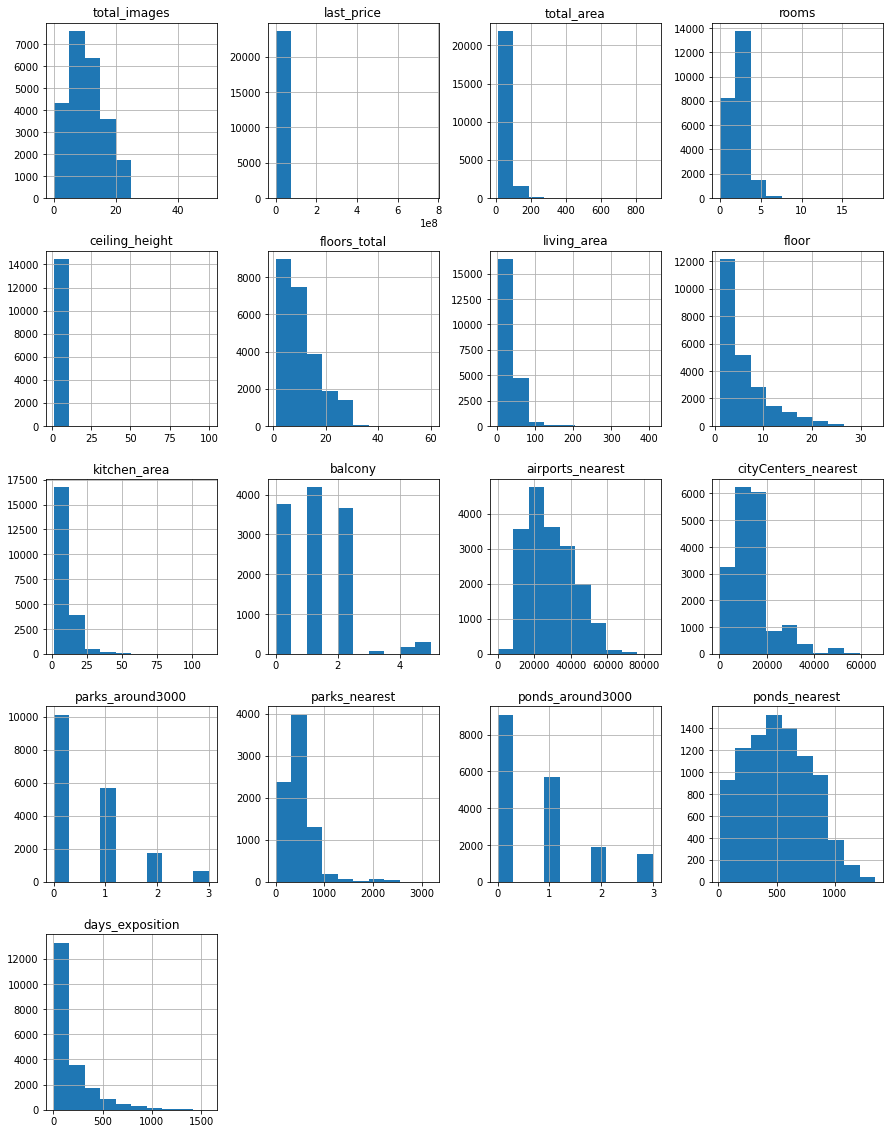

In [ ]:
import matplotlib.pyplot as plt

data.hist(figsize=(15, 20))
plt.show()

In [ ]:
data.shape # сколько в DF строк и столбцов

(23699, 22)

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

**Выведем количество пропущенных значений для каждого столбца.**

In [ ]:
missing = data.isna().sum()
print(missing[missing > 0])

ceiling_height          9195
floors_total              86
living_area             1903
is_apartment           20924
kitchen_area            2278
balcony                11519
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
dtype: int64


In [ ]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Пропуски в 14 столбцах. Заменим пропущенные значения там, где возможно на логичные значения.**

In [ ]:
# Заменим пропуски в столбце 'balcony' на 0
data['balcony'] = data['balcony'].fillna(0)

# Заменим пропуски в столбце 'is_apartment' на False
data['is_apartment'] = data['is_apartment'].fillna(False)

# Заменим пропущенные значения в столбце 'ceiling_height' медианным значением
data['ceiling_height'].fillna(data['ceiling_height'].median(),inplace = True)

# Заменим пропущенные значения в столбце 'days_exposition' медианным значением
data['days_exposition'].fillna(data['days_exposition'].median(),inplace = True)

missing = data.isna().sum()
print(missing[missing > 0])

floors_total              86
living_area             1903
kitchen_area            2278
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
dtype: int64


**Посмотрим уникальные значения в столбце 'ceiling_height'**

In [ ]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

**По уникальным значениям видно, что есть аномальные значения высоты потолка. В стандартных квартирах принята высота потолков от 2.5 метров, в домах со вторым светом максимальная высота 6 метров. Допустим высоту от 2.5 метров до 10. Значения выше 10 метров разделим на 10(скорее всего здесь ошибка в запятой), а значения меньше 2.5 заменим медианой.**

In [ ]:
data.loc[(data.ceiling_height > 10), 'ceiling_height'] = data['ceiling_height']/10
data.loc[(data.ceiling_height < 2.5), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.73,
        2.84,  3.1 ,  3.4 ,  3.06,  2.72,  2.54,  2.51,  2.78,  2.76,
        2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,  3.6 ,  2.92,
        3.11,  3.13,  3.8 ,  3.15,  3.55,  3.16,  3.62,  3.12,  2.53,
        2.74,  2.96,  5.3 ,  5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,
        3.54,  3.53,  2.83,  4.7 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,
        3.18,  3.35,  3.57,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  8.3 ,  2.98,  2.86,  3.17,  4.4 ,  3.28,  3.04,  4.45,
        5.5 ,  3.84,

**Обработаем пропуски в столбцах с данными площади квартир.**

*Заполним пропуски в столбце 'kitchen_area'*

In [ ]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    (data['kitchen_area'] / data['total_area']).median()*data['total_area']

data['kitchen_area'].isna().sum() # проверим наличие пропусков

0

*Заполним пропуски в столбце 'living_area'*

In [ ]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    (data['living_area'] / data['total_area']).median()*data['total_area']

data['living_area'].isna().sum() # проверим наличие пропусков

0

*Проверим правильность заполнения данных в столбце 'kitchen_area' выполнением условия:*
*'kitchen_area' < 'total_area' - 'living_area'*


In [ ]:
data_kitchen = data.query('(total_area - living_area) <= kitchen_area')
print(data_kitchen.shape)
data.shape

(181, 22)


(23699, 22)

*181 строк не соответствуют условиям. Ввиду того, что процент этих сток от общего датафрейма мал, удалим их.*

In [ ]:
data = data.query('(total_area - living_area) > kitchen_area')
data.shape # убедимся, что строки удалены

(23518, 22)

*Столбец 'floors_total' можно заполнить максимально возможным значением ввиду малого процента от общего объёма данных*

In [ ]:
data['floors_total'].fillna(data['floor'],inplace = True)
data_floors = data.query('floors_total < floor') # проверим выполнение условия
data_floors.shape


(0, 22)

**Раасмотрим типы данных в столбцах. Найдём столбцы, в которых нужно изменить тип данных и преобразуем в выбранных столбцах.**

*В столбце 'first_day_exposition' тип данных object. Заменим его на datatime, чтобы можно было работать с датами.*

In [ ]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

*В столбце 'floors_total' тип данных float64. Количество этажей может быть только целым числом. Заменим тип данных на int64.*

In [ ]:
data['floors_total'] = data['floors_total'].astype('int')

*В столбце 'balcony' тип данных float64. Количество балконов может быть только целым числом. Заменим тип данных на int64.*

In [ ]:
data['balcony'] = data['balcony'].astype('int')

*В столбце 'days_exposition' тип данных float64. Количество дней может быть только целым числом. Заменим тип данных на int64.*

In [ ]:
data['days_exposition'] = data['days_exposition'].astype('int')

*В столбце 'last_price' тип данных float64. Цена может быть только целым числом. Заменим тип данных на int64.*

In [ ]:
data['last_price'] = data['last_price'].astype('int')

*В столбцах 'parks_around3000' и 'ponds_around3000' тип данных float64. Количество парков и водоёмов может быть только целым числом, но в столбцах есть пропуски. В этом случае мы не можем изменить тип данных, не заполнив пропуски. Оставим пока без изменения типы данных этих столбцов.*
*Посмотрим результат.*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23518 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23518 non-null  int64         
 1   last_price            23518 non-null  int64         
 2   total_area            23518 non-null  float64       
 3   first_day_exposition  23518 non-null  datetime64[ns]
 4   rooms                 23518 non-null  int64         
 5   ceiling_height        23518 non-null  float64       
 6   floors_total          23518 non-null  int64         
 7   living_area           23518 non-null  float64       
 8   floor                 23518 non-null  int64         
 9   is_apartment          23518 non-null  bool          
 10  studio                23518 non-null  bool          
 11  open_plan             23518 non-null  bool          
 12  kitchen_area          23518 non-null  float64       
 13  balcony         

**Проверим столбец 'locality_name' на неявные дубликаты.**

In [ ]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

**Уберём все слова, которые могут участвовать в дублированиии названий населённых пунктов.**

In [ ]:
duplicates = ['поселок ', 'городского ', 'типа ', 'посёлок ', 'село ', 'при ', 'железнодорожной ', 'станции ',\
              'коттеджный ', 'городской ', 'деревня ', 'садоводческое некоммерческое ', 'садовое ', 'товарищество ']
name = ''
data['locality_name'] = data['locality_name'].replace(duplicates, name, regex=True)
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

**Проверим наши данные на явные дубликаты.**

In [ ]:
data.duplicated().sum()

0

**Наличие пропусков значений, неявных дубликатов объясняется как человеческим фактором, так и источником данных. Наибольшее количество пропусков в картографических данных, полученных из интернета. Возможно, данные ещё не были внесены в картографическую базу данных, либо присутствовала техническая ошибка. В пользовательских данных больше неявных дубликатов и аномальных значений, вызванных человеческим фактором.**

### Посчитайте и добавьте в таблицу новые столбцы

#### Посчитаем стоимость одноко кв.метра для каждого объекта недвижимости и добавим в отдельный столбец.

In [ ]:
data['price_square_meter'] = data['last_price']/data['total_area']

#### Добавим столбец дня недели, месяца и года публикации объявления.

In [ ]:
import datetime as dt
data['day_week'] = data['first_day_exposition'].dt.weekday # день недели публикации (0 - пн, 1 - вт, 2 - ср,... )
data['month'] = data['first_day_exposition'].dt.month # месяц пупликации
data['year'] = data['first_day_exposition'].dt.year # год публицкации

#### Добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»).

In [ ]:
def floor_tуpe(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_tуpe'] = data.apply(floor_tуpe, axis=1)

#### Добавим столбец с расстоянием до центра города в километрах.

In [ ]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()

### Проведите исследовательский анализ данных

#### Изучим параметры объектов и построим гистограммы.

**Построим гистограмму по общей площади объектов**

<AxesSubplot:>

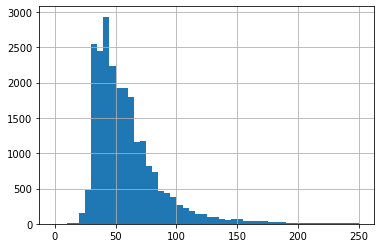

In [ ]:
data['total_area'].hist(range=(0,250),bins=50)

*Большее коичество объектов имеет площадь от 40 до 70 кв.метров.*

**Построим гистограмму по жилой площади объектов.**

<AxesSubplot:>

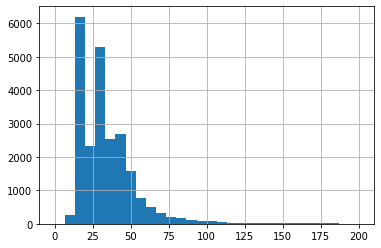

In [ ]:
data['living_area'].hist(range=(0,200),bins=30)


*Жилая площадь у большинства объектов от 20 до 50 кв.метров.*

**Построим гистограмму по кухонной площади объектов.**

<AxesSubplot:>

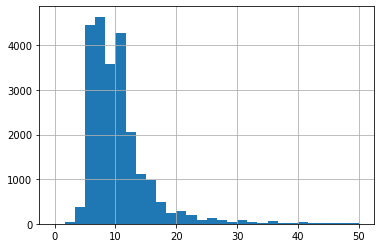

In [ ]:
data['kitchen_area'].hist(range=(0,50),bins=30)

*Площадь кухни у большинства объектов от 6 до 15 метров.*

**Гистограмма по ценам объектов.**

<AxesSubplot:>

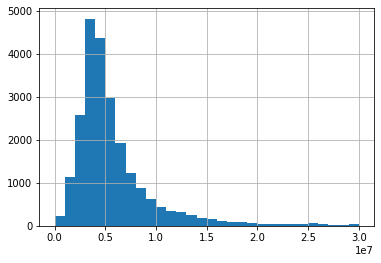

In [ ]:
data['last_price'].hist(range=(0,30_000_000),bins=30)

*Основной диапазон цен от 2 000 000 руб до 15 000 000 руб.*

**Гистограмма по количеству комнат объектов.**

<AxesSubplot:>

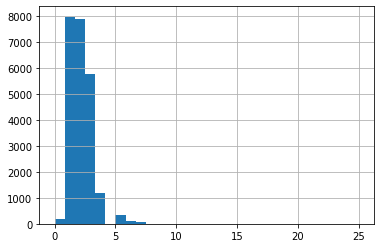

In [ ]:
data['rooms'].hist(range=(0,25),bins=30)

*Большинство объектов имеют от 1 до 4 комнат.*

**Высота потолков.**

<AxesSubplot:>

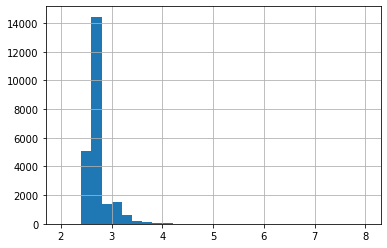

In [ ]:
data['ceiling_height'].hist(range=(2,8),bins=30)

*У большинства объектов высота потолков от 2,5 до 3,5 метров.*

**Гистограмма этажа объектов.**

<AxesSubplot:>

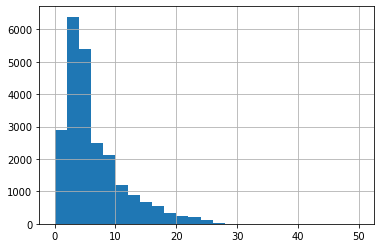

In [ ]:
data['floor'].hist(range=(0,50),bins=25)

*Основная масса квартир находятся с 1 по 20 этаж.*

**Тип этажа квартиры («первый», «последний», «другой»).**

<AxesSubplot:>

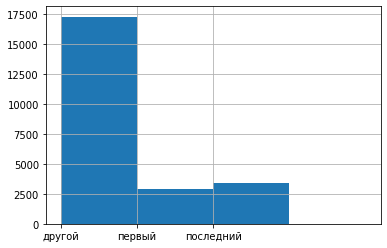

In [ ]:
data['floor_tуpe'].hist(range=(0,4),bins=4)

*Большинство квартир находятся не на первом и не на последнем этажах.*

**Общее количество этажей в доме.**

<AxesSubplot:>

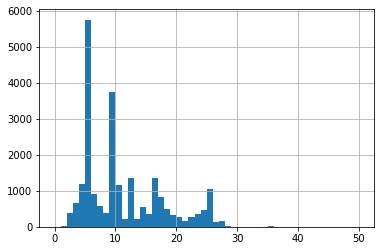

In [ ]:
data['floors_total'].hist(range=(0,50),bins=50)

*В базе больше всего 6 этажных домов.*

**Расстояние до центра города в метрах.**

<AxesSubplot:>

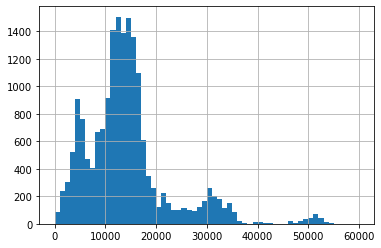

In [ ]:
data['cityCenters_nearest'].hist(range=(0,60000),bins=60)

*Основная масса квартир находятся на расстоянии 5 000 - 35 000 м. Больше всего на расстоянии 11 000 - 14 000 метров.*

**Расстояние до ближайшего аэропорта.**

<AxesSubplot:>

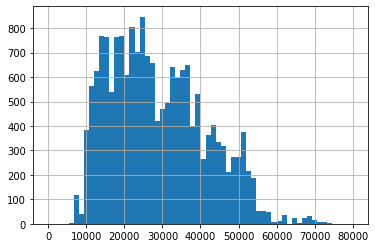

In [ ]:
data['airports_nearest'].hist(range=(0,80000),bins=60)

*Большинство объектов находятся на расстоянии от 11 000 до 40 000 метров. Шаговая доступность аэропорта не является преимуществом для жизни.*

**Расстояние до ближайшего парка.**

<AxesSubplot:>

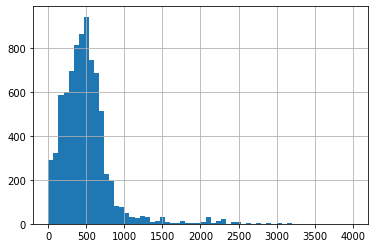

In [ ]:
data['parks_nearest'].hist(range=(0,4000),bins=60)

*У большинства объектов расстояние до ближайшего парка около 500 метров. Скорее всего продавцы указывают расстояние до парка, если это является преимуществом. В противном случае могут просто не указать.*

**День и месяц публикации объявления.**

<AxesSubplot:>

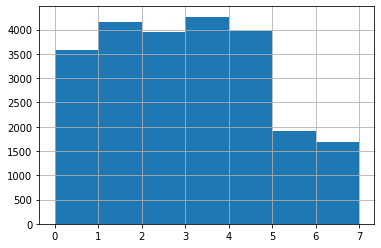

In [ ]:

data['day_week'].hist(range=(0,7),bins=7)

*Чаще всего публикуют объявления в будние дни.*


<AxesSubplot:>

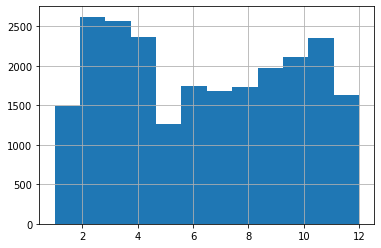

In [ ]:
data['month'].hist(range=(1,12),bins=12)

*В феврале пик подачи новых объявлений.*

#### Изучим, как быстро продавались квартиры.

*Построим гистограмму размаха.*

<AxesSubplot:>

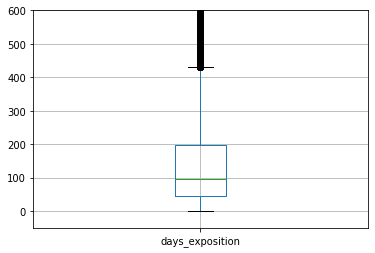

In [ ]:
import matplotlib.pyplot as plt
plt.ylim(-50,600)
data.boxplot('days_exposition')


*Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 450 дней — это ориентировочная граница нормального размаха. Всё, что лежит за ней выброс.*


*Посчитаем среднее и медиану столбца 'days_exposition'.*

In [ ]:
data['days_exposition'].describe()

count    23518.000000
mean       169.642827
std        206.767210
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

*Исходя из полученных данных, медиана - 95 дней, среднее арифметическое - 169.64, что соответствует графику.*
*Продажи недвижимости менее, чем через 45 дней  - необычно быстрые.*
*Продажи более, чем через 199 дней - необычно долгие.*

*Большое количество выбросов в данных влияют на значение среднего арифметического и смещают его значение в большую сторону. Большее количество объявлений было размещено 95 дней.*

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

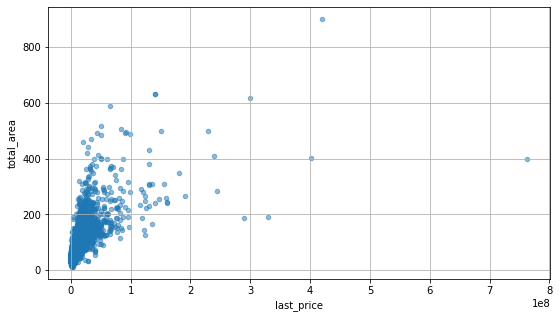

In [ ]:
# Зависимость цены от общей площади. Построим диаграмму рассеяния.

data.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.5, figsize=(9,5))

In [ ]:
# коэффициент корреляции
data['last_price'].corr(data['total_area'])

0.6534732456617031

*По диаграмме видно, что цена зависит от общей площади и эта зависимость стремится к линейной. Рост одной величины связан с ростом другой. Конечно, не только площадь влияет на цену. Рассмотрим другие возможные зависимости.*

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

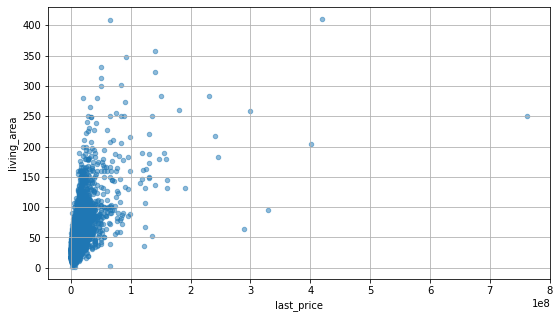

In [ ]:
# Зависимость цены от жилой площади. Построим диаграмму рассеяния.

data.plot(x='last_price', y='living_area', kind='scatter', grid=True, alpha=0.5, figsize=(9,5))

In [ ]:
# коэффициент корреляции
data['last_price'].corr(data['living_area'])

0.5840182360216803

*Коэффициент положительный, поэтому при увеличении жилой площади цена будет расти.*

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

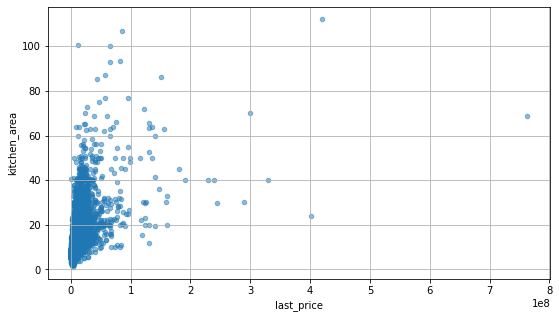

In [ ]:
# Зависимость цены от площади кухни. Построим диаграмму рассеяния.

data.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, alpha=0.5, figsize=(9,5))

In [ ]:
# коэффициент корреляции
data['last_price'].corr(data['kitchen_area'])

0.5148288657485827

0.3618982069471513

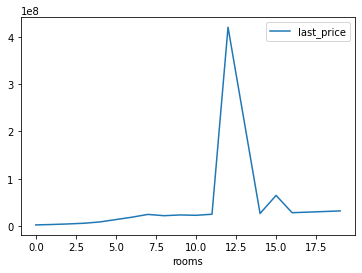

In [ ]:
# построим сводную таблицу по количеству комнат

room = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
room.plot()

# коэффициент корреляции
data['rooms'].corr(data['last_price'])

*По коэффициенту корреляции видно, что линейная связь слабая.*

,last_price
floor_tуpe,
другой,4850000
первый,3900000
последний,4350000


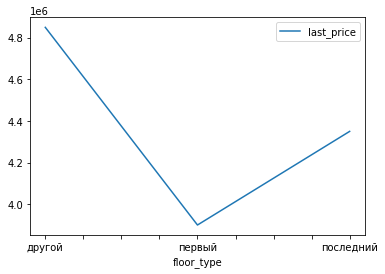

In [ ]:
# построим сводную таблицу по этажу, на котором расположена квартира

floors = data.pivot_table(index='floor_tуpe', values='last_price', aggfunc = 'median')
floors.plot()
floors



*В данном случае видно, что самые популярные квартиры не на первом и не на последнем этажах, соответственно они дороже.*

,last_price
floor_tуpe,
другой,4850000
первый,3900000
последний,4350000


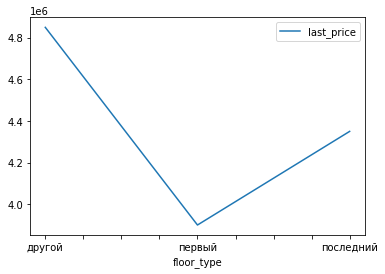

In [ ]:
# построим сводную таблицу по этажу, на котором расположена квартира

floors = data.pivot_table(index='floor_tуpe', values='last_price', aggfunc = 'median')
floors.plot()
floors


,last_price
day_week,
0,6.509317e+06
1,6.407285e+06
2,6.594344e+06
3,6.697808e+06
4,6.373716e+06
5,7.001917e+06
6,6.259747e+06


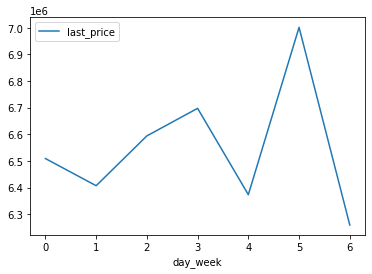

In [ ]:
# построим сводную таблицу по дню недели подачи объявления и цены

day_weeks = data.pivot_table(index='day_week', values='last_price')
day_weeks.plot()
day_weeks

*По субботам подают объявления самых дорогих квартир, по воскресеньям самых дешевых.*

,last_price
month,
1,6.682809e+06
2,6.479878e+06
3,6.362551e+06
4,6.749825e+06
5,6.621845e+06
6,6.284562e+06
7,6.640024e+06
8,6.340556e+06
9,6.844902e+06


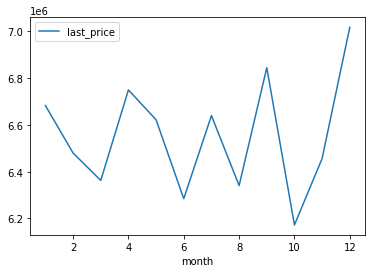

In [ ]:
# построим сводную таблицу по месяцу подачи объявления и цены

months = data.pivot_table(index='month', values='last_price')
months.plot()
months


*К декабрю цены на квартиры поднимаются.*

,last_price
year,
2014,1.227707e+07
2015,8.575438e+06
2016,6.824085e+06
2017,6.577872e+06
2018,5.948918e+06
2019,6.787520e+06


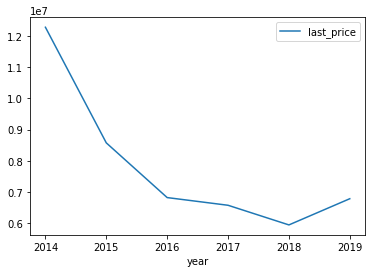

In [ ]:
# построим сводную таблицу по году подачи объявления и цены

years = data.pivot_table(index='year', values='last_price')
years.plot()
years


*Начиная с 2014 года, цены на недвижимость падали. В 2018 году появилась тенденция к росту цен на недвижимость.*

*По полученным данным видно, что наибольшее влияние на стоимость квартиры имеет общая площадь.*

,last_price
total_area,
13.0,2350000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0
15.5,2450000.0
...,...
590.0,65000000.0
618.0,300000000.0
631.0,140000000.0


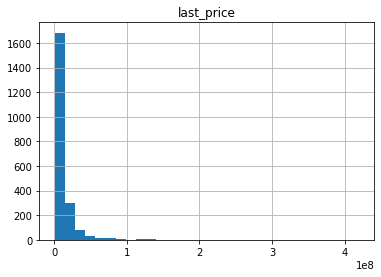

In [ ]:
# построим сводную таблицу по общей площади квартиры и цены

total_area_ = data.pivot_table(index='total_area', values='last_price')
total_area_.hist(bins=30)
total_area_


*По гистограмме видно, что при плавном росте цены, площади квартир уменьшаются активнее. Следовательно не столько цены падали на недвижимость, начиная с 2014 года, а площадь покупаемых квартир.*

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [ ]:
data['metr_price'] = data['last_price'] / data['total_area'] # новый столец с ценой за кв.метр

# содная таблица со средней ценой кв. метра в населённом пункте и количеством объявлений
locality_metr_price = data.pivot_table(index='locality_name', values='metr_price', aggfunc=('count', 'median'))
locality_metr_price = locality_metr_price.sort_values(by='count',ascending=False)
# 10 населённых пунктов с наибольшим числом объявлений
locality_metr_price.head(10)

,count,median
locality_name,,
Санкт-Петербург,15609,104651.162791
Мурино,578,86059.293995
Кудрово,467,95588.235294
Шушары,439,76829.268293
Всеволожск,390,65737.874097
Пушкин,369,100000.000000
Колпино,337,74725.274725
Парголово,326,91579.708641
Гатчина,303,67647.058824


In [ ]:
# населённый пункт самой низкой стоимостью квадратного метра

mean_min = locality_metr_price[locality_metr_price['median']==locality_metr_price['median'].min()]
mean_min


,count,median
locality_name,,
Старополье,3,11000.0


In [ ]:
# населённый пункт самой высокой стоимостью квадратного метра

mean_max = locality_metr_price[locality_metr_price['median']==locality_metr_price['median'].max()]
mean_max

,count,median
locality_name,,
Санкт-Петербург,15609,104651.162791


*Самая дорогая цена за кв.метр в Санкт-Петербурге, а низкая в Старополье. Наибольшее количество объявлений в Санкт-Петербурге.*

#### Cредняя цена  километра в Санкт-Петербурге.

                           metr_price
cityCenters_nearest_km               
0.0                     229150.212712
1.0                     176268.761787
2.0                     157943.103802
3.0                     121033.153588
4.0                     132646.480038
5.0                     140179.272703
6.0                     150195.025874
7.0                     156348.461854
8.0                     124716.765644
9.0                     112891.867284
10.0                    112766.746144
11.0                    108477.383131
12.0                    107420.300233
13.0                    108103.222388
14.0                    104165.681463


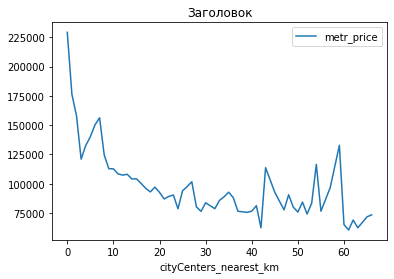

In [ ]:
# Создадим таблицу объявлений в Санкт-Петербурге и отсортируем по расстоянию в километрах от центра
city = data.query('locality_name=="Санкт-Петербург"').sort_values(by='cityCenters_nearest_km')

# Переведем километры в метры
#city['cityCenters_nearest'] = city['cityCenters_nearest_km']*1000

# Перезапишем таблицу по расстоянию от центра
city = data.pivot_table(index='cityCenters_nearest_km', values='metr_price').sort_values(by='cityCenters_nearest_km')
print(city.head(15))

# Построим гистаграмму
city.plot(title = 'Заголовок');
#city.hist(bins=50)

In [ ]:
spb = data.query('locality_name=="Санкт-Петербург"')
spb['cityCenters_nearest_km'].unique()

array([16., 14.,  7.,  8., 12., 15., 11., 13., 10.,  2.,  4., 17.,  5.,
       nan,  9.,  3.,  6., 21., 18.,  1., 24., 26., 22., 20., 23., 25.,
        0., 27., 28., 19., 29.])

*По диаграмме видно, что с отдалением от центра города, цена за квадратный метр падает. Это же подтверждаем сводная таблица.*

### Общий вывод

**В данном исследовании проведён анализ данных сервиса Яндекс Недвижимость.**

**Проведена предобаботка данных: заполнены или восстановлены пропущенные значения, изменены типы данных.**

**Наличие пропусков значений, неявных дубликатов объясняется как человеческим фактором, так и источником данных. Наибольшее количество пропусков в картографических данных, полученных из интернета. Возможно, данные ещё не были внесены в картографическую базу данных, либо присутствовала техническая ошибка. В пользовательских данных больше неявных дубликатов и аномальных значений, вызванных человеческим фактором.**

**Основные выводы из полученных данных:**

* Большее коичество объектов имеет площадь от 30 до 200 кв.метров.
* Жилая площадь у большинства объектов от 20 до 70 кв.метров.
* Площадь кухни у большинства объектов от 6 до 15 метров.
* Основной диапазон цен от 2 000 000 руб до 15 000 000 руб.
* Большинство объектов имеют от 1 до 4 комнат.
* У большинства объектов высота потолков от 2,5 до 3,5 метров.
* Основная масса квартир находятся с 1 по 20 этаж.
* Большинство квартир находятся не на первом и не на последнем этажах.
* Основная масса квартир находятся на расстоянии 5 000 - 35 000 м. Больше всего на расстоянии 11 000 - 14 000 метров.
* Большинство объектов находятся на расстоянии от 11 000 до 40 000 метров. Шаговая доступность аэропорта не является преимуществом для покупки квартиры.
* У большинства объектов расстояние до ближайшего парка около 500 метров. Скорее всего продавцы указывают расстояние до парка, если это является преимуществом. В противном случае могут просто не указать.
* Чаще всего публикуют объявления в будние дни.
* В феврале пик подачи новых объявлений, в мае наименьшее количество.
* Продажи недвижимости менее, чем через 45 дней - необычно быстрые. Продажи более, чем через 199 дней - необычно долгие. В среднем квартиры продаются за 95 дней.
* Больше всего цена зависит от общей площади.
* Меньше всего цены на квартиры на первом этаже.
* Начиная с 2014 года, цены на недвижимость падали вместе с уменьшением площади квартир. В 2018 году появилась тенденция к росту цен на недвижимость.
* Самая дорогая цена за кв.метр в Санкт-Петербурге, а низкая в Старополье. Наибольшее количество объявлений в Санкт-Петербурге.
* С отдалением от центра Санкт-Петербурга, цена за квадратный метр падает.

**Полученные данные помогут определять рыночную стоимость объектов недвижимости, что позволит в будующем построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.**